In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import json

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.models import AE, MLP_Decoder, MLP_Encoder
from src.utils import dotdict
from src.datasets import MNIST

In [8]:
mnist = MNIST(mode="flat")
train, eval = mnist.get_datasets()

9913344it [00:00, 23623377.95it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



29696it [00:00, 10682165.66it/s]         


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



1649664it [00:00, 19398498.72it/s]         


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



5120it [00:00, 10578737.18it/s]         


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Load json from defined directory
path = "../outputs/AE_2023-08-16_10-03-38/"

config = dotdict(json.load(open(path + "config.json")))
trained_model = AE(encoder=MLP_Encoder(config.encoder_layers), decoder=MLP_Decoder(config.decoder_layers))
trained_model.load_state_dict(torch.load(path + "model.pt"))
trained_model.eval()

AE(
  (encoder): MLP_Encoder(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=784, out_features=512, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=512, out_features=16, bias=True)
        (1): ReLU()
      )
    )
  )
  (decoder): MLP_Decoder(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=16, out_features=512, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=512, out_features=784, bias=True)
        (1): Sigmoid()
      )
    )
  )
)

In [6]:
config

{'encoder_layers': [784, 512, 16],
 'decoder_layers': [16, 512, 784],
 'lr': 0.0001,
 'batch_size': 128,
 'epochs': 200,
 'num_workers': 4,
 'optimizer': 'Adam',
 'scheduler': 'CosineAnnealingLR',
 'device': 'cuda',
 'output_dir': './outputs',
 'seed': 1337}

In [18]:
reconstructions = trained_model(eval[:25]).y_hat.detach().numpy()

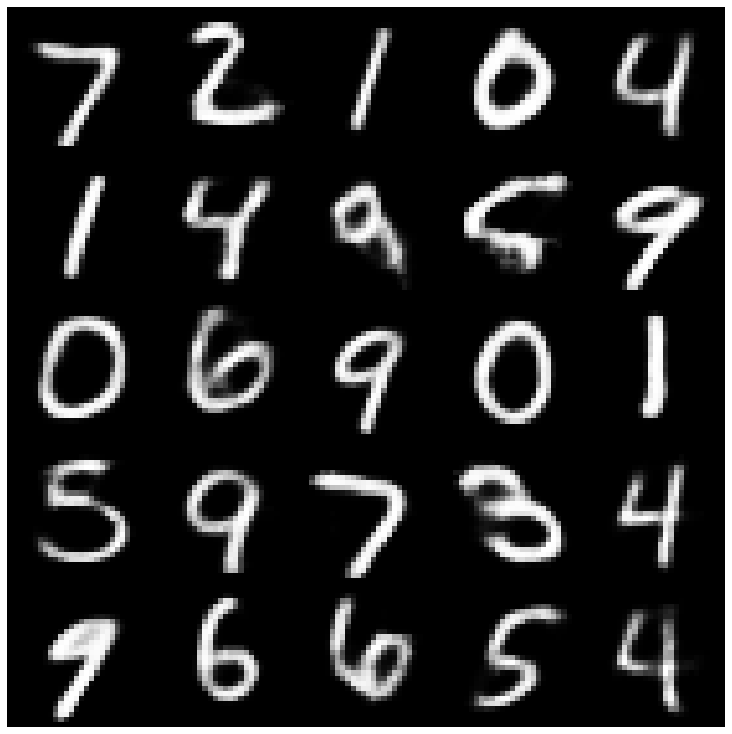

In [23]:
# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(reconstructions[i*5 + j].reshape(28,28), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

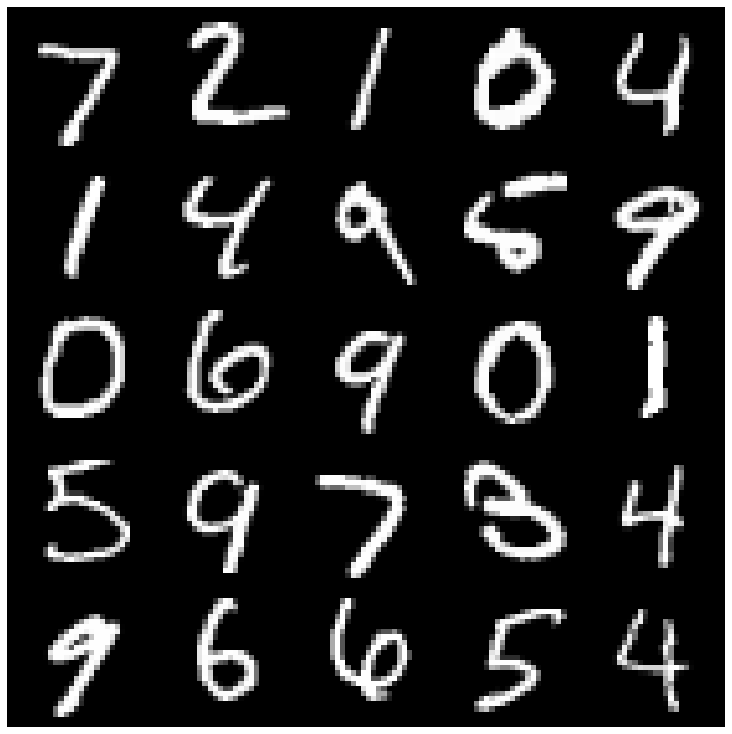

In [24]:
# show the true data
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval[i*5 +j].reshape(28,28), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)